In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

In [2]:
pwd

'/kaggle/working'

In [3]:
ls

In [4]:
df = pd.read_csv("/kaggle/input/rsna-intracranial-aneurysm-detection/train.csv")

In [9]:
pd.set_option("display.max_colwidth", None)

In [10]:
df.sample(10),

,SeriesInstanceUID,PatientAge,PatientSex,Modality,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
1396,1.2.826.0.1.3680043.8.498.17344466930828184539487237181093161345,68,Male,CTA,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2094,1.2.826.0.1.3680043.8.498.36175262388398924597343213973632107543,21,Female,MRI T1post,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1592,1.2.826.0.1.3680043.8.498.22886410568736603980012923714751139045,57,Female,MRI T2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
520,1.2.826.0.1.3680043.8.498.11432740655934005566264933201479788356,45,Male,CTA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2655,1.2.826.0.1.3680043.8.498.51971238650534415071698419937445648659,39,Male,MRA,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1472,1.2.826.0.1.3680043.8.498.19328926247826520377009143029219437438,48,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
577,1.2.826.0.1.3680043.8.498.11591388730085417200478566862614710230,47,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1560,1.2.826.0.1.3680043.8.498.22141640673473618661472818543537368084,19,Male,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2334,1.2.826.0.1.3680043.8.498.43145028612929773885808261646813922930,67,Female,MRI T1post,0,0,0,0,0,0,0,0,0,0,0,0,0,0
554,1.2.826.0.1.3680043.8.498.11517979322982429374724617746876669106,63,Female,CTA,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [14]:
df["SeriesInstanceUID"].unique()

array(['1.2.826.0.1.3680043.8.498.10004044428023505108375152878107656647',
       '1.2.826.0.1.3680043.8.498.10004684224894397679901841656954650085',
       '1.2.826.0.1.3680043.8.498.10005158603912009425635473100344077317',
       ...,
       '1.2.826.0.1.3680043.8.498.99953513260518059135058337324142717073',
       '1.2.826.0.1.3680043.8.498.99982144859397209076137275088962041066',
       '1.2.826.0.1.3680043.8.498.99985209798463601651869595532975221005'],
      dtype=object)

In [15]:
len(df["SeriesInstanceUID"].unique())

4405

In [11]:
df1 = pd.read_csv("/kaggle/input/rsna-intracranial-aneurysm-detection/train_localizers.csv")

In [16]:
df1.sample(10)

,SeriesInstanceUID,SOPInstanceUID,coordinates,location
548,1.2.826.0.1.3680043.8.498.12892386288917075193482381027665487134,1.2.826.0.1.3680043.8.498.91595578280594590680428657694277959646,"{'x': 276.99292847544, 'y': 214.04119304399248}",Left Supraclinoid Internal Carotid Artery
912,1.2.826.0.1.3680043.8.498.26773574285535517522032206464052720717,1.2.826.0.1.3680043.8.498.11013699245414068303680617978017705365,"{'x': 202.10526315789474, 'y': 192.8864265927978}",Right Middle Cerebral Artery
1098,1.2.826.0.1.3680043.8.498.35837326317283288337298165527022358828,1.2.826.0.1.3680043.8.498.10608845304846559710834583822332228944,"{'x': 284.1056835078102, 'y': 214.32112703934752}",Left Supraclinoid Internal Carotid Artery
1279,1.2.826.0.1.3680043.8.498.45789072046383277170393600308966109036,1.2.826.0.1.3680043.8.498.13274262230016556154669451968448359461,"{'x': 307.369670037612, 'y': 293.376492255997}",Right Infraclinoid Internal Carotid Artery
671,1.2.826.0.1.3680043.8.498.13967658402067580776928071535593395934,1.2.826.0.1.3680043.8.498.67896494804483389491714286302485116730,"{'x': 248.9189082278481, 'y': 237.0970464135021}",Basilar Tip
1487,1.2.826.0.1.3680043.8.498.56631565457717021899783801563858709864,1.2.826.0.1.3680043.8.498.12552525010463099934875915122842813334,"{'x': 289.8804347826087, 'y': 217.04347826086956}",Left Middle Cerebral Artery
2128,1.2.826.0.1.3680043.8.498.91760184134535552938736600593727198414,1.2.826.0.1.3680043.8.498.44498843245479596486087546778408849492,"{'x': 255.71274685816877, 'y': 203.14542190305207}",Left Supraclinoid Internal Carotid Artery
1943,1.2.826.0.1.3680043.8.498.83006372527330942383544617023303604213,1.2.826.0.1.3680043.8.498.49727056596131423147437157474034359406,"{'x': 265.62326869806094, 'y': 247.3130193905817}",Right Supraclinoid Internal Carotid Artery
2048,1.2.826.0.1.3680043.8.498.88038981176925960179146350049094273014,1.2.826.0.1.3680043.8.498.41544935408495338005763413411299476220,"{'x': 249.74285436559606, 'y': 219.38888888888889}",Right Supraclinoid Internal Carotid Artery
1621,1.2.826.0.1.3680043.8.498.65028406653095679109251259106560094283,1.2.826.0.1.3680043.8.498.12167636137364441803587886854097993958,"{'x': 337.56965944272446, 'y': 296.08978328173373}",Anterior Communicating Artery


In [18]:
len(df1["SOPInstanceUID"].unique())

2241

In [21]:
len(df), len(df1)

(4405, 2286)

### EDA

In [20]:
df1["location"].value_counts()

location
Anterior Communicating Artery                 375
Left Supraclinoid Internal Carotid Artery     354
Right Middle Cerebral Artery                  317
Right Supraclinoid Internal Carotid Artery    293
Left Middle Cerebral Artery                   226
Other Posterior Circulation                   124
Basilar Tip                                   113
Right Infraclinoid Internal Carotid Artery    104
Right Posterior Communicating Artery          101
Left Posterior Communicating Artery            88
Left Infraclinoid Internal Carotid Artery      83
Right Anterior Cerebral Artery                 62
Left Anterior Cerebral Artery                  46
Name: count, dtype: int64

In [23]:
localizers = df1

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

### Below graph shows in which location the disease is detected

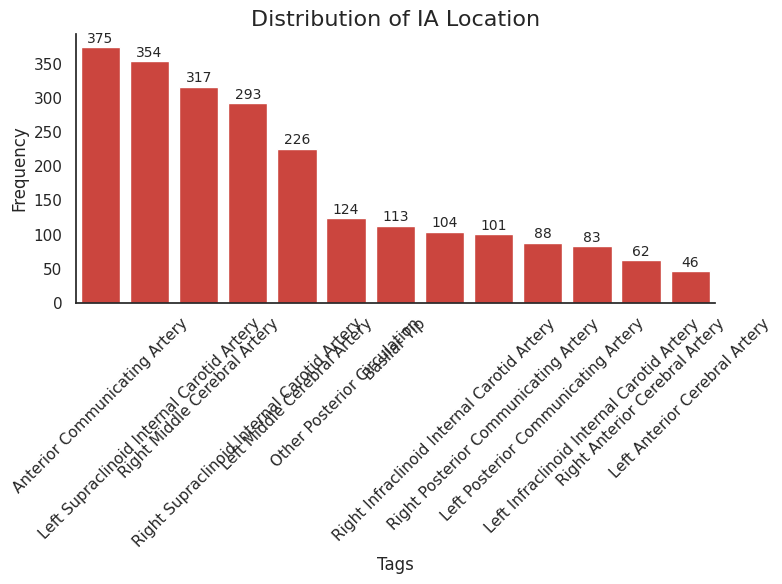

In [27]:
loc_counts = localizers["location"].value_counts()#Try different values of head
sns.set(style="white")
plt.figure(figsize=(8, 6))
#x=loc_counts.index, y=loc_counts.values
ax = sns.barplot(x=loc_counts.index, y=loc_counts.values, color=sns.color_palette("Reds", n_colors=5)[3])
plt.title("Distribution of IA Location", fontsize=16)
plt.xlabel("Tags", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
sns.despine()

#+2 is good if chart is vertical. +20 worked for horizontal
for i, v in enumerate(loc_counts.values):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Modality in Training Data

In [28]:
train = df

In [29]:
train['Modality'].value_counts()


Modality
CTA           1857
MRA           1256
MRI T2         986
MRI T1post     306
Name: count, dtype: int64

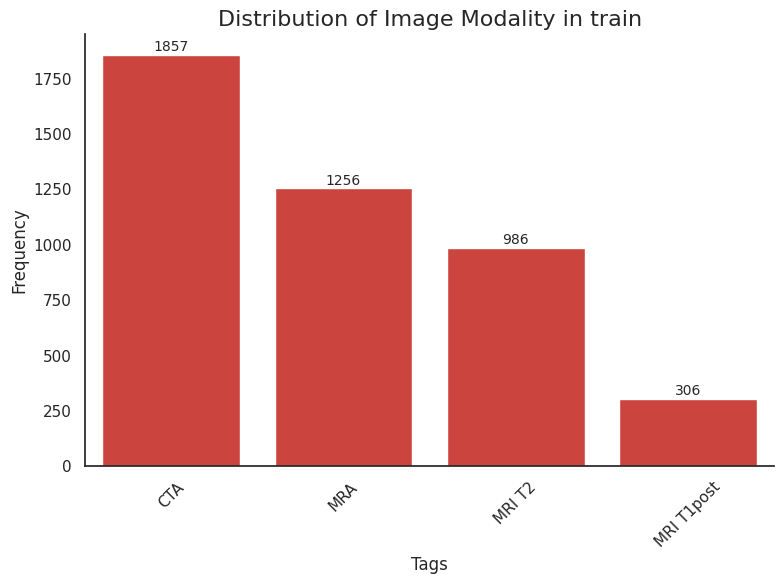

In [30]:
loc_counts = train['Modality'].value_counts()#Try different values of head
sns.set(style="white")
plt.figure(figsize=(8, 6))
#x=loc_counts.index, y=loc_counts.values
ax = sns.barplot(x=loc_counts.index, y=loc_counts.values, color=sns.color_palette("Reds", n_colors=5)[3])
plt.title("Distribution of Image Modality in train", fontsize=16)
plt.xlabel("Tags", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
sns.despine()

#+2 is good if chart is vertical. +20 worked for horizontal
for i, v in enumerate(loc_counts.values):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [31]:
train.describe().loc[['mean','min','max']].T

,mean,min,max
PatientAge,58.468104,18.0,89.0
Left Infraclinoid Internal Carotid Artery,0.017934,0.0,1.0
Right Infraclinoid Internal Carotid Artery,0.022474,0.0,1.0
Left Supraclinoid Internal Carotid Artery,0.077185,0.0,1.0
Right Supraclinoid Internal Carotid Artery,0.064018,0.0,1.0
Left Middle Cerebral Artery,0.049943,0.0,1.0
Right Middle Cerebral Artery,0.067877,0.0,1.0
Anterior Communicating Artery,0.083087,0.0,1.0
Left Anterior Cerebral Artery,0.010443,0.0,1.0
Right Anterior Cerebral Artery,0.012713,0.0,1.0


In [32]:
numerical_cols =['PatientAge',
 'Left Infraclinoid Internal Carotid Artery',
 'Right Infraclinoid Internal Carotid Artery',
 'Left Supraclinoid Internal Carotid Artery',
 'Right Supraclinoid Internal Carotid Artery',
 'Left Middle Cerebral Artery',
 'Right Middle Cerebral Artery',
 'Anterior Communicating Artery',
 'Left Anterior Cerebral Artery',
 'Right Anterior Cerebral Artery',
 'Left Posterior Communicating Artery',
 'Right Posterior Communicating Artery',
 'Basilar Tip',
 'Other Posterior Circulation',
 'Aneurysm Present']

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(train[numerical_cols].corr(), annot=True, cmap='summer')
plt.title("Correlation Between Numerical Features")
plt.show()